In [14]:
%load_ext autoreload
%autoreload 2

from principal_RBM_alpha import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
class DBN():
    def __init__(self, config) -> None:
        self.layers = []
        for i in range(len(config)-1):
            layer = init_RBM(config[i], config[i+1])
            self.layers.append(layer)
        self.n_layers = len(self.layers)

In [3]:
def init_DBN(config):
    """Initiate the parameters in RBM

    Parameters
    ----------
    config : list of integers
        number of neurones in each layer

    Returns
    -------
    instance of DBN class
    """
    assert len(config) > 2, "Must provide more than 2 integer arguments!"
    assert all(isinstance(x, int) for x in config), "All inputs must be integer!"
    return DBN(config)

In [8]:
def train_DBN(data, dbn, epochs, lr, batch_size):
    """Training process of DBN

    Parameters
    ----------
    data : numpy.ndarray: (n_samples, n_neurones_visible)
        training data
    dbn : instance of DBN class
        a DBN structure
    epochs : int
        number of epochs
    lr : float
        learning rate
    batch_size : int
        number of samples in one batch

    Returns
    -------
    dbn: a trained DBN instance
    """
    for i in range(dbn.n_layers):
        dbn.layers[i], _ = train_RBM(data, dbn.layers[i], epochs, lr, batch_size, verbose=0)
        data = entree_sortie_RBM(data, dbn.layers[i])
    return dbn

In [5]:
all_data = lire_alpha_digit()

Loading data...
Finished!


In [9]:
dbn = init_DBN([320, 200, 100, 50])
dbn_trained = train_DBN(all_data, dbn, 50, 1e-1, 16)

In [16]:
def generer_image_DBN(dbn_trained, n_gibbs, n_images, show_image=True):
    """Generate image from randomly sampled data

    Parameters
    ----------
    dbn_trained : a trained DBN
    n_gibbs : int
        number of iterations in Gibbs sampling in last layer of DBN
    n_images : int
        number of images to generate
    show_image : bool, optional
        whether to show images during generation, by default True
    """
    v = generer_image_RBM(dbn_trained.layers[-1], n_gibbs, n_images, show_image=False)
    for i in reversed(range(dbn_trained.n_layers-1)):
        v_proba = sortie_entree_RBM(v, dbn_trained.layers[i])
        v = np.random.binomial(1, v_proba, size=v_proba.shape)
    if show_image:
        for i in range(v.shape[0]):
            plt.figure()
            plt.imshow(v[i].reshape(20, 16))
    

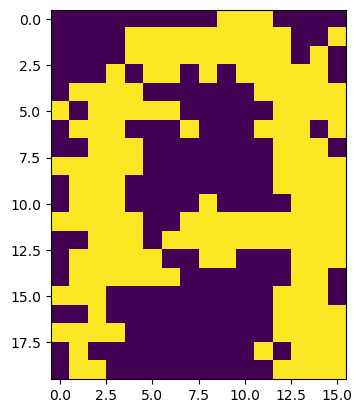

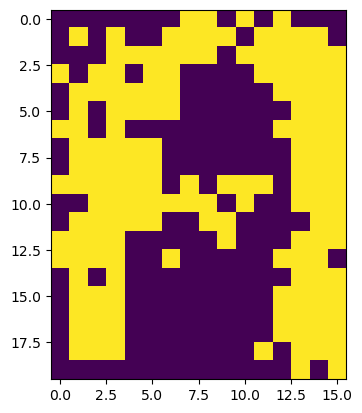

In [17]:
generer_image_DBN(dbn_trained, 200, 2)